In [1]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Import our input dataset
socio_health_df = pd.read_csv('Resources/us_county_sociohealth_data.csv')
socio_health_df.head()

,SN,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,...,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability
0,1,1001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,...,0.6339,0.5355,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773
1,2,1003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,...,0.5253,0.5282,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757
2,3,1005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,...,0.9042,0.6979,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847
3,4,1007,Alabama,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,471.0,...,0.6450,0.3553,0.5018,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737
4,5,1009,Alabama,Blount,33.980878,-86.567383,57704,644.806508,89.490412,1085.0,...,0.4238,0.7482,0.5992,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986


In [6]:
socio_health_df.dtypes

SN                                                       int64
fips                                                    object
state                                                   object
county                                                  object
lat                                                    float64
                                                        ...   
percentile_rank_no_vehicle                             float64
percentile_rank_institutionalized_in_group_quarters    float64
percentile_rank_housing_and_transportation             float64
percentile_rank_social_vulnerability                   float64
geolocation                                             object
Length: 185, dtype: object

In [54]:
# make a new column from turple of lat and lon
latitude = socio_health_df['lat'].to_list()
longitude = socio_health_df['lon'].to_list()
geolocation = list(zip(latitude, longitude))
geolocation

[(32.53492796, -86.64274781),
 (30.72748899, -87.72257524),
 (31.86958881, -85.39321291),
 (32.99863415, -87.12648014),
 (33.9808782, -86.56738341),
 (32.10053438, -85.71568627),
 (31.75241781, -86.68030288),
 (33.77143651, -85.82603459),
 (32.91435287, -85.39203349),
 (34.17592601, -85.60380039),
 (32.84786998, -86.71880376),
 (32.019777500000004, -88.2631849),
 (31.67668212, -87.83081391),
 (33.2690306, -85.86058307),
 (33.67451959, -85.51881383),
 (31.40265228, -85.98815917),
 (34.70047669, -87.80493371),
 (31.42923975, -86.99367837),
 (32.93624951, -86.24765729),
 (31.24849866, -86.45127715),
 (31.73153754, -86.31357901),
 (34.13195, -86.86758257),
 (31.43181495, -85.61100904),
 (32.32597601, -87.10647208),
 (34.45980613, -85.80411386),
 (32.59665284, -86.14916394),
 (31.12614174, -87.16158370000001),
 (34.04526554, -86.03476326),
 (33.72123026, -87.73886639),
 (34.44169874, -87.84373986),
 (31.0950592, -85.83909125),
 (32.85315674, -87.9522131),
 (32.76266973, -87.62915115),
 (31.

In [45]:
# import acute_care_hospital_locations file
cond_acute_care_df = pd.read_csv('Resources/acute_care_hospital_locations.csv')
cond_acute_care_df.head()

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE,GEOLOCATION
0,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,34.154939,-118.815736,"(34.1549388720001, -118.815736391)"
1,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,34.023647,-118.184165,"(34.023647302, -118.184164805)"
2,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,34.096391,-118.325235,"(34.0963913570001, -118.325234871)"
3,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,34.063039,-117.967438,"(34.063038932, -117.967437788)"
4,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,33.859707,-118.148403,"(33.8597066200001, -118.148402965)"


In [57]:
LATITUDE = cond_acute_care_df['LATITUDE'].to_list()
LONGITUDE = cond_acute_care_df['LONGITUDE'].to_list()
GEOLOCATION = list(zip(LATITUDE, LONGITUDE))
GEOLOCATION

[(34.1549388720001, -118.815736391),
 (34.023647302, -118.184164805),
 (34.0963913570001, -118.325234871),
 (34.063038932, -117.967437788),
 (33.8597066200001, -118.148402965),
 (34.1487586590001, -117.99266765700001),
 (34.0494660590001, -118.138262231),
 (33.8580833070001, -117.553858035),
 (41.4800562550001, -120.54574398700001),
 (36.659030455999996, -121.645983804),
 (33.7474607400001, -117.831055631),
 (33.934495886, -117.893948792),
 (33.7635332090001, -117.99525596299999),
 (36.320843946, -119.34823452799999),
 (30.006906976999996, -91.79452385299999),
 (31.32360364, -95.43889930599993),
 (32.8239916700001, -92.65664868100001),
 (32.0600399510001, -92.099137669),
 (33.8070928700001, -118.19338992899999),
 (37.706406198, -122.16465451799999),
 (31.985430321, -81.15455636899999),
 (32.886297701, -84.33650698799991),
 (32.0669623380001, -84.2560501999999),
 (33.3848346460001, -84.757746692),
 (18.380443000000106, -65.95579000000001),
 (43.035812152000105, -88.037265823),
 (31.2521

In [58]:
# determine if county is medical desert
import geopy.distance
from vincenty import vincenty

min_dist = []
med_desert = []
for i in geolocation:
    dist_list = []
    for j in GEOLOCATION:
        dist = vincenty(i, j, miles=True)
        dist_list.append(dist)
    min_dist.append(min(dist_list))
    if min(dist_list)>60:
        med_desert.append('Yes')
    else:
        med_desert.append('No')
socio_health_df['Is_Medical_Desert'] = med_desert
socio_health_df.head()

,SN,fips,state,county,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,...,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,geolocation,Is_Medical_Desert
0,1,1001,Alabama,Autauga,32.534928,-86.642748,55049,594.446120,92.605533,791.0,...,0.5976,0.6791,0.7268,0.2477,0.3298,0.1251,0.2881,0.3773,"(32.53492796, -86.64274781)",No
1,2,1003,Alabama,Baldwin,30.727489,-87.722575,199510,1589.807425,125.493187,2967.0,...,0.5294,0.9733,0.5387,0.2639,0.0872,0.3438,0.3324,0.2757,"(30.72748899, -87.72257524)",No
2,3,1005,Alabama,Barbour,31.869589,-85.393213,26614,884.875776,30.076538,472.0,...,0.8558,0.2814,0.9370,0.4438,0.8816,0.9427,0.9312,0.9847,"(31.86958881, -85.39321291)",No
3,4,1007,Alabama,Bibb,32.998634,-87.126480,22572,622.582355,36.255444,471.0,...,0.5018,0.4072,0.9249,0.0248,0.5645,0.9156,0.6663,0.5737,"(32.99863415, -87.12648014)",No
4,5,1009,Alabama,Blount,33.980878,-86.567383,57704,644.806508,89.490412,1085.0,...,0.5992,0.1344,0.8465,0.5056,0.1907,0.1515,0.1827,0.4986,"(33.9808782, -86.56738341)",No


In [70]:
# keep only relevant columns
sh_category_df = socio_health_df[['lat', 'lon', 'percent_fair_or_poor_health', 'average_number_of_physically_unhealthy_days',
                                'percent_smokers', 'percent_adults_with_obesity', 'food_environment_index', 'percent_physically_inactive',
                                 'percent_excessive_drinking', 'teen_birth_rate', 'percent_uninsured', 'Is_Medical_Desert']].dropna(axis=0)
sh_category_df.head()

,lat,lon,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_excessive_drinking,teen_birth_rate,percent_uninsured,Is_Medical_Desert
0,32.534928,-86.642748,20.882987,4.743889,18.081557,33.3,7.2,34.7,15.026031,25.284927,8.721686,No
1,30.727489,-87.722575,17.509134,4.224519,17.489033,31.0,8.0,26.5,17.958310,27.880692,11.333404,No
2,31.869589,-85.393213,29.591802,5.430279,21.999985,41.7,5.6,23.5,12.844016,40.870815,12.242792,No
3,32.998634,-87.126480,19.439724,4.591482,19.114200,37.6,7.8,33.5,15.570042,41.696794,10.206253,No
4,33.980878,-86.567383,21.745293,4.860808,19.208672,33.8,8.4,30.3,14.230594,33.534595,13.360759,No


In [71]:
# encode categorical data

sh_category_encoded = pd.get_dummies(sh_category_df, columns=['Is_Medical_Desert'])
sh_category_encoded.head()

,lat,lon,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_excessive_drinking,teen_birth_rate,percent_uninsured,Is_Medical_Desert_No,Is_Medical_Desert_Yes
0,32.534928,-86.642748,20.882987,4.743889,18.081557,33.3,7.2,34.7,15.026031,25.284927,8.721686,1,0
1,30.727489,-87.722575,17.509134,4.224519,17.489033,31.0,8.0,26.5,17.958310,27.880692,11.333404,1,0
2,31.869589,-85.393213,29.591802,5.430279,21.999985,41.7,5.6,23.5,12.844016,40.870815,12.242792,1,0
3,32.998634,-87.126480,19.439724,4.591482,19.114200,37.6,7.8,33.5,15.570042,41.696794,10.206253,1,0
4,33.980878,-86.567383,21.745293,4.860808,19.208672,33.8,8.4,30.3,14.230594,33.534595,13.360759,1,0


In [72]:
sh_category_encoded.dtypes

lat                                            float64
lon                                            float64
percent_fair_or_poor_health                    float64
average_number_of_physically_unhealthy_days    float64
percent_smokers                                float64
percent_adults_with_obesity                    float64
food_environment_index                         float64
percent_physically_inactive                    float64
percent_excessive_drinking                     float64
teen_birth_rate                                float64
percent_uninsured                              float64
Is_Medical_Desert_No                             uint8
Is_Medical_Desert_Yes                            uint8
dtype: object

In [73]:
# import dependencies for machine learning
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [74]:
# Split data into feature and target
y = sh_category_encoded['average_number_of_physically_unhealthy_days']
X = sh_category_encoded.drop('average_number_of_physically_unhealthy_days', axis=1)

In [75]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [76]:
# instanciate a LinearRegression model
model = LinearRegression()

In [81]:
# Train the model with the training data
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# test the model with the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(743,)


In [83]:
# print model coeficient (slope) and intercept
print(model.coef_)
print(model.intercept_)

[-0.0011175  -0.00369706  0.09546798  0.07257437 -0.00805024  0.00212782
 -0.00208574 -0.02993963 -0.00194404 -0.01598469  0.05391409 -0.05391409]
1.735439583680873


In [95]:
print(X_test.shape)
print(y_pred.shape)
y_pred[:20,]

(743, 12)
(743,)


array([4.1169939 , 4.32210317, 3.9128326 , 3.77646652, 3.0724463 ,
       3.66169602, 3.34310769, 4.88469874, 4.15044843, 4.41051328,
       3.5337209 , 3.82672115, 4.21246316, 5.17160126, 3.48047489,
       4.0943552 , 3.69819074, 4.49989952, 3.70349634, 3.90834828])

In [89]:
y_test[:20,]

2877    3.748159
2159    4.370432
2205    3.911805
900     3.613579
2812    3.286540
2229    3.795122
1373    3.028311
120     4.820256
727     3.968153
785     4.491379
973     3.193085
2085    3.748394
2098    4.258425
45      5.285484
2111    3.549306
1082    4.302176
2547    3.910189
2294    4.636788
2643    3.928370
908     3.873692
Name: average_number_of_physically_unhealthy_days, dtype: float64

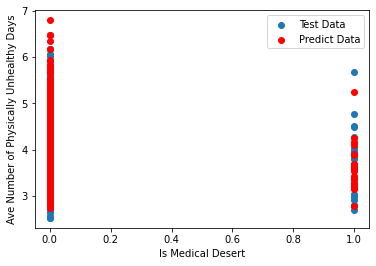

In [99]:
plt.scatter(X_test.Is_Medical_Desert_Yes, y_test)
plt.scatter(X_test.Is_Medical_Desert_Yes, y_pred, color='red')
plt.xlabel('Is Medical Desert')
plt.ylabel('Ave Number of Physically Unhealthy Days')
plt.legend(['Test Data', 'Predict Data'])
plt.show()